In [8]:
import itertools

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [9]:
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [3]:
def principal_component_analysis(x_train):

    """
    Principal Component Analysis (PCA) identifies the combination
    of attributes (principal components, or directions in the feature space)
    that account for the most variance in the data.

    Let's calculate the 2 first principal components of the training data,
    and then create a scatter plot visualizing the training data examples
    projected on the calculated components.
    """

    # Extract the variable to be predicted
    y_train = x_train["TARGET"]
    x_train = x_train.drop(labels="TARGET", axis=1)
    classes = np.sort(np.unique(y_train))
    labels = ["Satisfied customer", "Unsatisfied customer"]

    # Normalize each feature to unit norm (vector length)
    x_train_normalized = normalize(x_train, axis=0)
    
    # Run PCA
    pca = PCA(n_components=2)
    x_train_projected = pca.fit_transform(x_train_normalized)

    # Visualize
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    colors = [(0.0, 0.63, 0.69), 'black']
    markers = ["o", "D"]
    for class_ix, marker, color, label in zip(classes, markers, colors, labels):
        ax.scatter(x_train_projected[np.where(y_train == class_ix), 0],
                   x_train_projected[np.where(y_train == class_ix), 1],
                   marker=marker, color=color, edgecolor='whitesmoke',
                   linewidth='1', alpha=0.9, label=label)
        ax.legend(loc='best')
    plt.title(
        "Scatter plot of the training data examples projected on the "
        "2 first principal components")
    plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
    plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))
    plt.show()

#     plt.savefig("pca.pdf", format='pdf')
#     plt.savefig("pca.png", format='png')

In [5]:
def remove_feat_constants(data_frame):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    print("")
    print("Deleting zero variance features...")
    # Let's get the zero variance features by fitting VarianceThreshold
    # selector to the data, but let's not transform the data with
    # the selector because it will also transform our Pandas data frame into
    # NumPy array and we would like to keep the Pandas data frame. Therefore,
    # let's delete the zero variance features manually.
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold()
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    # Print info
    n_features_deleted = feat_ix_delete.size
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame

In [6]:
def remove_feat_identicals(data_frame):
    # Find feature vectors having the same values in the same order and
    # remove all but one of those redundant features.
    print("")
    print("Deleting identical features...")
    n_features_originally = data_frame.shape[1]
    
    # Find the names of identical features by going through all the
    # combinations of features (each pair is compared only once).
    feat_names_delete = []
    for feat_1, feat_2 in itertools.combinations(
            iterable=data_frame.columns, r=2):
        if np.array_equal(data_frame[feat_1], data_frame[feat_2]):
            feat_names_delete.append(feat_2)
    feat_names_delete = np.unique(feat_names_delete)
    
    # Delete the identical features
    data_frame = data_frame.drop(labels=feat_names_delete, axis=1)
    n_features_deleted = len(feat_names_delete)
    
    print("  - Deleted %s / %s features (~= %.1f %%)" % (n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    
    return data_frame


Deleting zero variance features...
  - Deleted 34 / 370 features (~= 9.2 %)

Deleting identical features...
  - Deleted 29 / 336 features (~= 8.6 %)


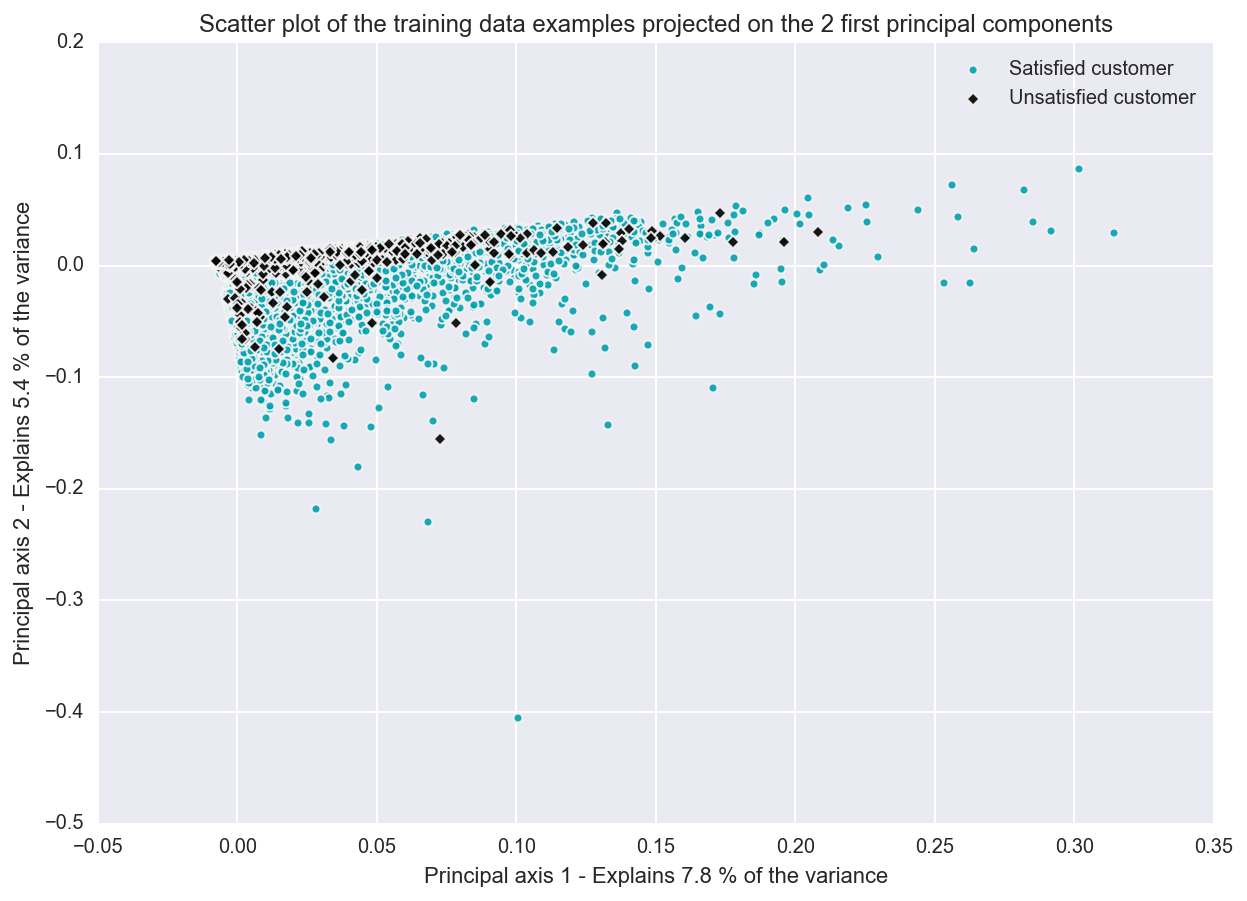

In [10]:
if __name__ == "__main__":
    x_train = pd.read_csv(filepath_or_buffer="~/GitHub/practice/data/train.csv",
                          index_col=0, sep=',')
    x_train = remove_feat_constants(x_train)
    x_train = remove_feat_identicals(x_train)
    principal_component_analysis(x_train)